## 7_市值轮动策略
当沪深300指数强于创业版时，满仓用价值选股买沪深300成分股，满仓用动能选股买创业板成分股，反之相反。

## 操作步骤
1. 导入模块
2. 读取两个板块的选股结果
3. 进入引擎回测，每周选股换股
4. 加入沪深指数低于MA(40)即空仓的条件

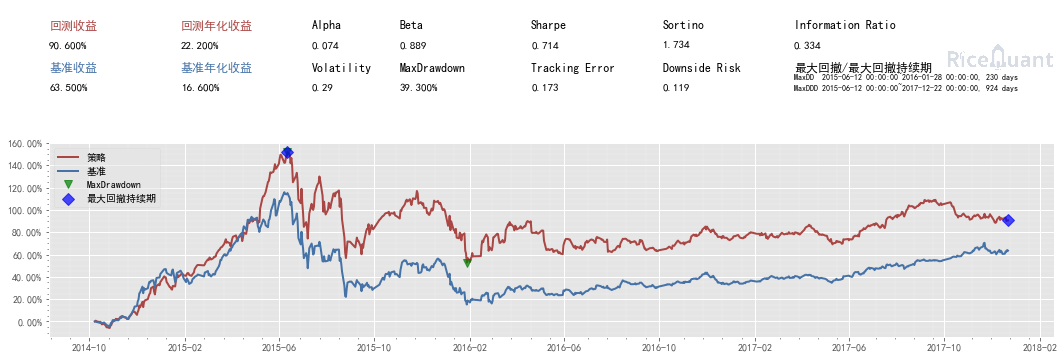

{'sys_analyser': {'benchmark_portfolio':                cash  market_value  static_unit_net_value  total_value  \
  date                                                                    
  2014-10-08  1212.86     998787.14                  1.000   1000000.00   
  2014-10-09  1212.86    1000229.88                  1.000   1001442.74   
  2014-10-10  1212.86     994116.37                  1.001    995329.23   
  2014-10-13  1212.86     989344.85                  0.995    990557.71   
  2014-10-14  1212.86     985963.68                  0.991    987176.54   
  2014-10-15  1212.86     992939.61                  0.987    994152.47   
  2014-10-16  1212.86     985093.20                  0.994    986306.06   
  2014-10-17  1212.86     984017.19                  0.986    985230.05   
  2014-10-20  1212.86     989248.13                  0.985    990460.99   
  2014-10-21  1212.86     980656.17                  0.990    981869.03   
  2014-10-22  1212.86     974711.92                  0.982   

In [16]:
import numpy as np
import talib as ta
import pandas as pd
import rqalpha
from rqalpha.api import *

#读取文件位置
def init(context):
    context.hs300 = '000300.XSHG'
    context.hs300_codes = pd.read_excel('factor.xlsx',index_col='date')
    context.gem = '399606.XSHE'
    context.gem_codes = pd.read_excel('gem_factor.xlsx', index_col='date')
    context.hs300_stocks = []
    context.gem_stocks = []
    scheduler.run_weekly(hs300_pool, tradingday=1)
    scheduler.run_weekly(gem_pool, tradingday=1)

def hs300_pool(context, bar_dict):
    try:
        codes = context.hs300_codes.loc[context.now]
    except KeyError:
        return
    stocks = codes.index[codes == 1]
    context.hs300_stocks = stocks

def gem_pool(context, bar_dict):
    try:
        codes = context.gem_codes.loc[context.now]
    except KeyError:
        return
    stocks = codes.index[codes == 1]
    context.gem_stocks = stocks
    
    
def buy_hs300(context, bar_dict):
    pool = context.hs300_stocks
    if pool is not None:
        stocks_len = len(pool)
        for stocks in context.portfolio.positions:
            if stocks not in pool:
                order_target_percent(stocks, 0)
        result = []
        for codes in pool:
            if codes not in result and codes not in context.portfolio.positions:
                result.append(codes)
        if len(result):
            for r in result:
                order_target_percent(r, 1.0/stocks_len)

                    
def buy_gem(context, bar_dict):
    pool = context.gem_stocks
    if pool is not None:
        stocks_len = len(pool)
        for stocks in context.portfolio.positions:
            if stocks not in pool:
                order_target_percent(stocks, 0)
        result = []
        for codes in pool:
            if codes not in result and codes not in context.portfolio.positions:
                result.append(codes)
        if len(result):
            for r in result:
                order_target_percent(r, 1.0/stocks_len)

def handle_bar(context, bar_dict):
    hs300_price = history_bars(context.hs300, 41,'1d','close')
    gem_price = history_bars(context.gem, 41,'1d','close')
    hs300_mom = ta.ROCR100(hs300_price,10)
    gem_mom = ta.ROCR100(gem_price,10)
    if hs300_mom[-1]>gem_mom[-1]:
        buy_hs300(context, bar_dict)
    elif hs300_mom[-1]<gem_mom[-1]:
        buy_gem(context, bar_dict)
               
config = {
  "base": {
    "start_date": "2014-10-01",
    "end_date": "2017-12-22",
    "accounts": {'stock':1000000},
    "benchmark": "000300.XSHG"
  },
  "extra": {
    "log_level": "error",
  },
  "mod": {
    "sys_analyser": {
      "enabled": True,
      "plot": True
    }
  }
}

rqalpha.run_func(init=init, handle_bar=handle_bar, config=config)

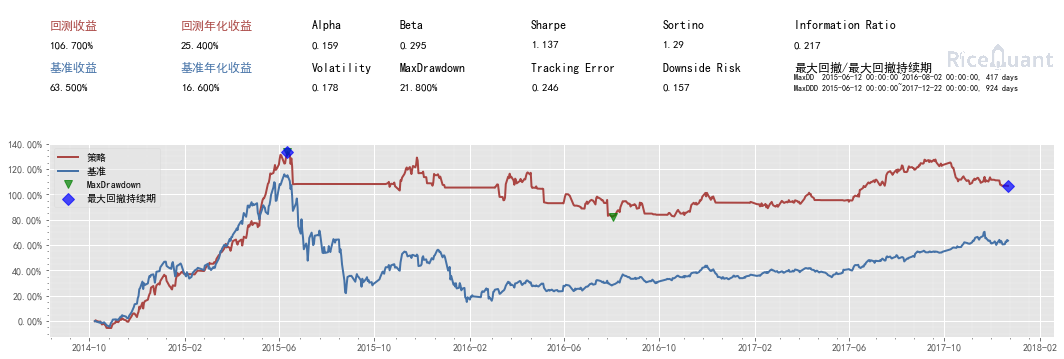

{'sys_analyser': {'benchmark_portfolio':                cash  market_value  static_unit_net_value  total_value  \
  date                                                                    
  2014-10-08  1212.86     998787.14                  1.000   1000000.00   
  2014-10-09  1212.86    1000229.88                  1.000   1001442.74   
  2014-10-10  1212.86     994116.37                  1.001    995329.23   
  2014-10-13  1212.86     989344.85                  0.995    990557.71   
  2014-10-14  1212.86     985963.68                  0.991    987176.54   
  2014-10-15  1212.86     992939.61                  0.987    994152.47   
  2014-10-16  1212.86     985093.20                  0.994    986306.06   
  2014-10-17  1212.86     984017.19                  0.986    985230.05   
  2014-10-20  1212.86     989248.13                  0.985    990460.99   
  2014-10-21  1212.86     980656.17                  0.990    981869.03   
  2014-10-22  1212.86     974711.92                  0.982   

In [17]:
import numpy as np
import talib as ta
import pandas as pd
import rqalpha
from rqalpha.api import *

#读取文件位置
def init(context):
    context.hs300 = '000300.XSHG'
    context.hs300_codes = pd.read_excel('factor.xlsx',index_col='date')
    context.gem = '399606.XSHE'
    context.gem_codes = pd.read_excel('gem_factor.xlsx', index_col='date')
    context.hs300_stocks = []
    context.gem_stocks = []
    scheduler.run_weekly(hs300_pool, tradingday=1)
    scheduler.run_weekly(gem_pool, tradingday=1)

def hs300_pool(context, bar_dict):
    try:
        codes = context.hs300_codes.loc[context.now]
    except KeyError:
        return
    stocks = codes.index[codes == 1]
    context.hs300_stocks = stocks

def gem_pool(context, bar_dict):
    try:
        codes = context.gem_codes.loc[context.now]
    except KeyError:
        return
    stocks = codes.index[codes == 1]
    context.gem_stocks = stocks
    
    
def buy_hs300(context, bar_dict):
    pool = context.hs300_stocks
    if pool is not None:
        stocks_len = len(pool)
        for stocks in context.portfolio.positions:
            if stocks not in pool:
                order_target_percent(stocks, 0)
        result = []
        for codes in pool:
            if codes not in result and codes not in context.portfolio.positions:
                result.append(codes)
        if len(result):
            for r in result:
                order_target_percent(r, 1.0/stocks_len)

                    
def buy_gem(context, bar_dict):
    pool = context.gem_stocks
    if pool is not None:
        stocks_len = len(pool)
        for stocks in context.portfolio.positions:
            if stocks not in pool:
                order_target_percent(stocks, 0)
        result = []
        for codes in pool:
            if codes not in result and codes not in context.portfolio.positions:
                result.append(codes)
        if len(result):
            for r in result:
                order_target_percent(r, 1.0/stocks_len)

def sell_all(context):
    for stock in context.portfolio.positions:
        order_target_percent(stock, 0)


def can_trade(context):
    try:
        hs300_price = history_bars(context.hs300,61,'1d','close')
        hs300_ma = ta.MA(hs300_price,40)
        if hs300_price[-1]<hs300_ma[-1]:
            sell_all(context)
            return False
        else:
            return True
    except KeyError:
        return

def handle_bar(context, bar_dict):
    if can_trade(context):
        hs300_price = history_bars(context.hs300, 41,'1d','close')
        gem_price = history_bars(context.gem, 41,'1d','close')
        hs300_mom = ta.ROCR100(hs300_price,10)
        gem_mom = ta.ROCR100(gem_price,10)
        if hs300_mom[-1]>gem_mom[-1]:
            buy_hs300(context, bar_dict)
        elif hs300_mom[-1]<gem_mom[-1]:
            buy_gem(context, bar_dict)
               
config = {
  "base": {
    "start_date": "2014-10-01",
    "end_date": "2017-12-22",
    "accounts": {'stock':1000000},
    "benchmark": "000300.XSHG"
  },
  "extra": {
    "log_level": "error",
  },
  "mod": {
    "sys_analyser": {
      "enabled": True,
      "plot": True
    }
  }
}

rqalpha.run_func(init=init, handle_bar=handle_bar, config=config)